# TEXT MINING: TERM PAPER

In [1]:
import pandas as pd
from stop_words import get_stop_words
import numpy as np
import re
import nltk
from textblob import TextBlob
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns

### Vader Lexicon: Package that classifies social media text as +, - or neutral

In [2]:
nltk.download('vader_lexicon')
stop_words = get_stop_words('en')


[nltk_data] Downloading package vader_lexicon to C:\Users\FDN-
[nltk_data]     Aysu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Download tweets

In [3]:
inp1 = pd.read_csv('C:/Users/FDN-Aysu/tweets_last_v2.csv')
inp1

C:\Users\FDN-Aysu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (19,20,21,23,56,58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,created_at,...,geo.geo.bbox,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 73
0,1311455777559916544,1311455777559916544,NaN,1.311328e+18,NaN,340456854,NaN,1.052516e+08,NaN,2020-09-30T23:59:57.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-22T00:18:02+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN
1,1311455775496171520,1311455775496171520,NaN,1.311325e+18,NaN,34047021,NaN,1.363500e+09,NaN,2020-09-30T23:59:57.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-22T00:18:02+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN
2,1311455774162509824,1311337975326871552,1.311338e+18,NaN,NaN,3185704998,71294756.0,NaN,NaN,2020-09-30T23:59:56.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-22T00:18:02+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN
3,1311455770110824449,1311455770110824449,NaN,1.311451e+18,NaN,1035903072,NaN,1.221462e+18,NaN,2020-09-30T23:59:55.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-22T00:18:02+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN
4,1311455767531319296,1311455767531319296,NaN,1.311118e+18,NaN,949532217906089986,NaN,2.771886e+08,NaN,2020-09-30T23:59:55.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-22T00:18:02+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983895,1311063223580405761,1311063223580405761,NaN,1.311048e+18,NaN,16174144,NaN,2.208443e+07,NaN,2020-09-29T22:00:05.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-22T09:02:36+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN
983896,1311063217486135297,1311063217486135297,NaN,NaN,NaN,137494549,NaN,NaN,NaN,2020-09-29T22:00:04.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-22T09:02:36+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN
983897,1311063211907731457,1311063211907731457,NaN,NaN,NaN,3420477195,NaN,NaN,NaN,2020-09-29T22:00:02.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-22T09:02:36+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN
983898,1311063207239471106,1311063207239471106,NaN,NaN,NaN,289750722,NaN,NaN,NaN,2020-09-29T22:00:01.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-22T09:02:36+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN


### Get time of tweets:

In [4]:
inp1['time'] = inp1['created_at'].apply(lambda x: x[0:10]+" "+x[11:19])
inp1

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,created_at,...,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 73,time
0,1311455777559916544,1311455777559916544,NaN,1.311328e+18,NaN,340456854,NaN,1.052516e+08,NaN,2020-09-30T23:59:57.000Z,...,NaN,NaN,NaN,NaN,NaN,2022-03-22T00:18:02+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN,2020-09-30 23:59:57
1,1311455775496171520,1311455775496171520,NaN,1.311325e+18,NaN,34047021,NaN,1.363500e+09,NaN,2020-09-30T23:59:57.000Z,...,NaN,NaN,NaN,NaN,NaN,2022-03-22T00:18:02+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN,2020-09-30 23:59:57
2,1311455774162509824,1311337975326871552,1.311338e+18,NaN,NaN,3185704998,71294756.0,NaN,NaN,2020-09-30T23:59:56.000Z,...,NaN,NaN,NaN,NaN,NaN,2022-03-22T00:18:02+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN,2020-09-30 23:59:56
3,1311455770110824449,1311455770110824449,NaN,1.311451e+18,NaN,1035903072,NaN,1.221462e+18,NaN,2020-09-30T23:59:55.000Z,...,NaN,NaN,NaN,NaN,NaN,2022-03-22T00:18:02+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN,2020-09-30 23:59:55
4,1311455767531319296,1311455767531319296,NaN,1.311118e+18,NaN,949532217906089986,NaN,2.771886e+08,NaN,2020-09-30T23:59:55.000Z,...,NaN,NaN,NaN,NaN,NaN,2022-03-22T00:18:02+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN,2020-09-30 23:59:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983895,1311063223580405761,1311063223580405761,NaN,1.311048e+18,NaN,16174144,NaN,2.208443e+07,NaN,2020-09-29T22:00:05.000Z,...,NaN,NaN,NaN,NaN,NaN,2022-03-22T09:02:36+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN,2020-09-29 22:00:05
983896,1311063217486135297,1311063217486135297,NaN,NaN,NaN,137494549,NaN,NaN,NaN,2020-09-29T22:00:04.000Z,...,NaN,NaN,NaN,NaN,NaN,2022-03-22T09:02:36+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN,2020-09-29 22:00:04
983897,1311063211907731457,1311063211907731457,NaN,NaN,NaN,3420477195,NaN,NaN,NaN,2020-09-29T22:00:02.000Z,...,NaN,NaN,NaN,NaN,NaN,2022-03-22T09:02:36+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN,2020-09-29 22:00:02
983898,1311063207239471106,1311063207239471106,NaN,NaN,NaN,289750722,NaN,NaN,NaN,2020-09-29T22:00:01.000Z,...,NaN,NaN,NaN,NaN,NaN,2022-03-22T09:02:36+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.8.3,NaN,2020-09-29 22:00:01


In [5]:
# datetime.strptime(inp1['time'][0], '%H:%M:%S')
# date_time_obj = datetime.strptime(inp1['time'][0], '%Y-%m-%d %H:%M:%S')
inp1['time'] = inp1['time'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

### Get only English tweets:

In [6]:
mask = inp1['lang'] == 'en'
inp2 = inp1[mask]
inp2
df = inp2[['time', 'text']]
df

,time,text
0,2020-09-30 23:59:57,"#Debate was bad, even for 2020.\nthe president..."
1,2020-09-30 23:59:57,What does a Trump Brush do? It paints everythi...
2,2020-09-30 23:59:56,@wolfblitzer @TheReelRandom Make the debate vi...
3,2020-09-30 23:59:55,"Meet Nancy, a lifelong Republican Who has deci..."
4,2020-09-30 23:59:55,By GAWD! Is that?!? It is!!!! BERNIE WITH CHAI...
...,...,...
983895,2020-09-29 22:00:05,I’m not really into politics but my hat is off...
983896,2020-09-29 22:00:04,The first presidential debate is all about lie...
983897,2020-09-29 22:00:02,"In honor of tonight’s debate, we made a word s..."
983898,2020-09-29 22:00:01,"I should probably eat before the #debate. Ugh,..."


### Instantiate Sentiment Analyzer class

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

### Text pre-processing

In [8]:
#cleaning the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:")

    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")

    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")

    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")

    return tweets

In [9]:
df['cleaned'] = clean_tweets(df['text'])
df

<ipython-input-9-d22d944213bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned'] = clean_tweets(df['text'])


,time,text,cleaned
0,2020-09-30 23:59:57,"#Debate was bad, even for 2020.\nthe president...","#Debate was bad, even for 2020.\nthe president..."
1,2020-09-30 23:59:57,What does a Trump Brush do? It paints everythi...,What does a Trump Brush do? It paints everythi...
2,2020-09-30 23:59:56,@wolfblitzer @TheReelRandom Make the debate vi...,"Make the debate virtual, with the candidates..."
3,2020-09-30 23:59:55,"Meet Nancy, a lifelong Republican Who has deci...","Meet Nancy, a lifelong Republican Who has deci..."
4,2020-09-30 23:59:55,By GAWD! Is that?!? It is!!!! BERNIE WITH CHAI...,By GAWD! Is that?!? It is!!!! BERNIE WITH CHAI...
...,...,...,...
983895,2020-09-29 22:00:05,I’m not really into politics but my hat is off...,I’m not really into politics but my hat is off...
983896,2020-09-29 22:00:04,The first presidential debate is all about lie...,The first presidential debate is all about lie...
983897,2020-09-29 22:00:02,"In honor of tonight’s debate, we made a word s...","In honor of tonight’s debate, we made a word s..."
983898,2020-09-29 22:00:01,"I should probably eat before the #debate. Ugh,...","I should probably eat before the #debate. Ugh,..."


### Get polarity scores:

In [10]:
df['compound'] = df['cleaned'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['positive'] = df['cleaned'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
df['negative'] = df['cleaned'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
df['neutral'] = df['cleaned'].apply(lambda x: analyzer.polarity_scores(x)['neu'])

<ipython-input-10-2944e0b7698d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound'] = df['cleaned'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
<ipython-input-10-2944e0b7698d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positive'] = df['cleaned'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
<ipython-input-10-2944e0b7698d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [31]:
joe = ['joe', 'biden', 'joe biden']
donald = ['trump', 'donald', 'donald trump']

### To see if tweet is talking about Biden or Trump

In [32]:
df['Trump'] = df['cleaned'].apply(lambda x: 1 if any(substring in x.lower() for substring in donald) else 0)
df['Biden'] = df['cleaned'].apply(lambda x: 1 if any(substring in x.lower() for substring in joe) else 0)

<ipython-input-32-dcda88a896b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Trump'] = df['cleaned'].apply(lambda x: 1 if any(substring in x.lower() for substring in donald) else 0)
<ipython-input-32-dcda88a896b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Biden'] = df['cleaned'].apply(lambda x: 1 if any(substring in x.lower() for substring in joe) else 0)


In [33]:
df['both'] = df['Trump']*df['Biden']
# df

<ipython-input-33-9315bc1de404>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['both'] = df['Trump']*df['Biden']


### Separate tweets about Biden and Trump

In [34]:
mask_joe = df['Biden'] == 1
mask_don = df['Trump'] == 1

joe = df[mask_joe]
trump = df[mask_don]

### Group-by time of tweet: In extended version, need to group by minute of tweet

In [35]:
d = {'compund':'compound', 'positive':'pos','negative':'neg', 'neutral':'neu', 'Trump':'Trump', 'Biden':'Biden'}
trump = trump.groupby('time').agg({'compound':'mean', 'positive':'mean','negative':'mean', 'neutral':'mean', 'Trump':'max', 'Biden':'max'}).rename(columns=d)
trump = trump.reset_index()
joe = joe.groupby('time').agg({'compound':'mean', 'positive':'mean','negative':'mean', 'neutral':'mean', 'Trump':'max', 'Biden':'max'}).rename(columns=d)
joe = joe.reset_index()

### Plot sentiment scores over time: In extended version, we expect to see some pattern emerge, solidyfying the support for one candidate or the other, looking at all the debates

In [36]:
joe

,time,compound,pos,neg,neu,Trump,Biden
0,2020-09-29 22:00:04,-0.8225,0.000,0.2170,0.7830,1,1
1,2020-09-29 22:00:05,0.8150,0.326,0.0000,0.6740,1,1
2,2020-09-29 22:00:06,-0.2233,0.000,0.0445,0.9555,1,1
3,2020-09-29 22:00:13,0.0000,0.000,0.0000,1.0000,1,1
4,2020-09-29 22:00:14,0.0000,0.000,0.0000,1.0000,0,1
...,...,...,...,...,...,...,...
57699,2020-09-30 23:59:44,-0.4329,0.078,0.1440,0.7780,1,1
57700,2020-09-30 23:59:47,0.3818,0.113,0.0600,0.8270,1,1
57701,2020-09-30 23:59:48,-0.8074,0.000,0.2490,0.7510,1,1
57702,2020-09-30 23:59:55,-0.7650,0.000,0.1760,0.8240,1,1


In [37]:
joe=joe.groupby(pd.Grouper(key="time", freq="15min")).mean()
trump=trump.groupby(pd.Grouper(key="time", freq="15min")).mean()

Text(0.5, 1.0, 'Positive Tweets')

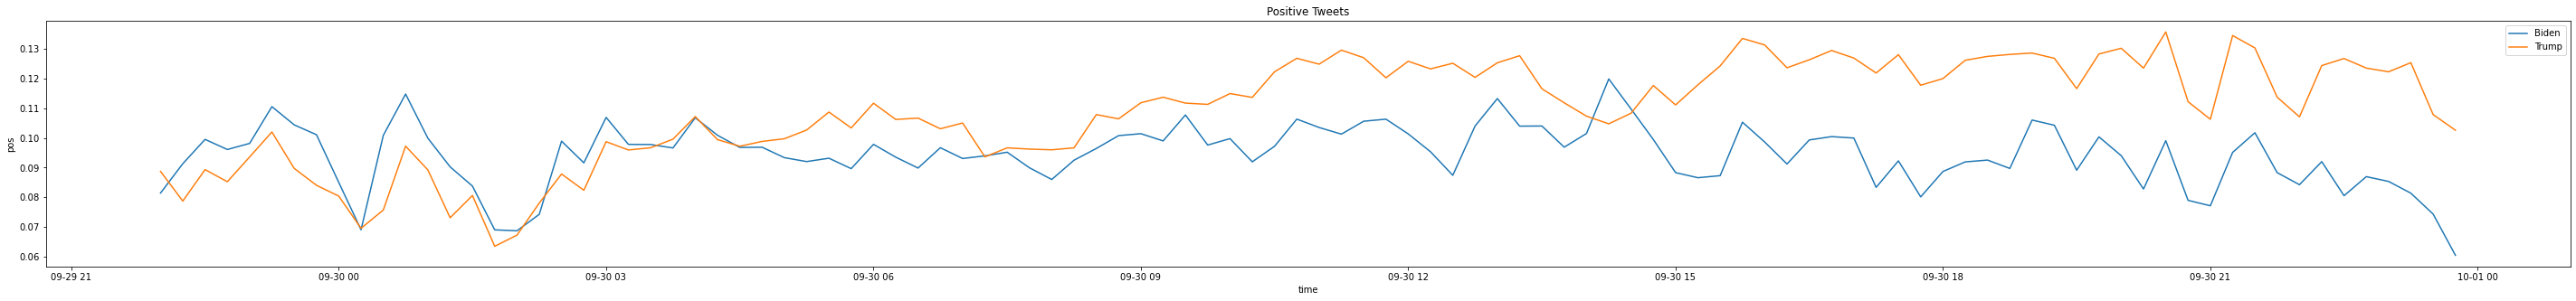

In [40]:
fig, ax = plt.subplots(figsize=(50, 5))
sns.lineplot(data=joe, x='time', y='pos', label = 'Biden', ax=ax).set_title("Positive Tweets")
sns.lineplot(data=trump, x='time', y='pos', label = 'Trump', ax=ax).set_title("Positive Tweets")

Text(0.5, 1.0, 'Negative Tweets')

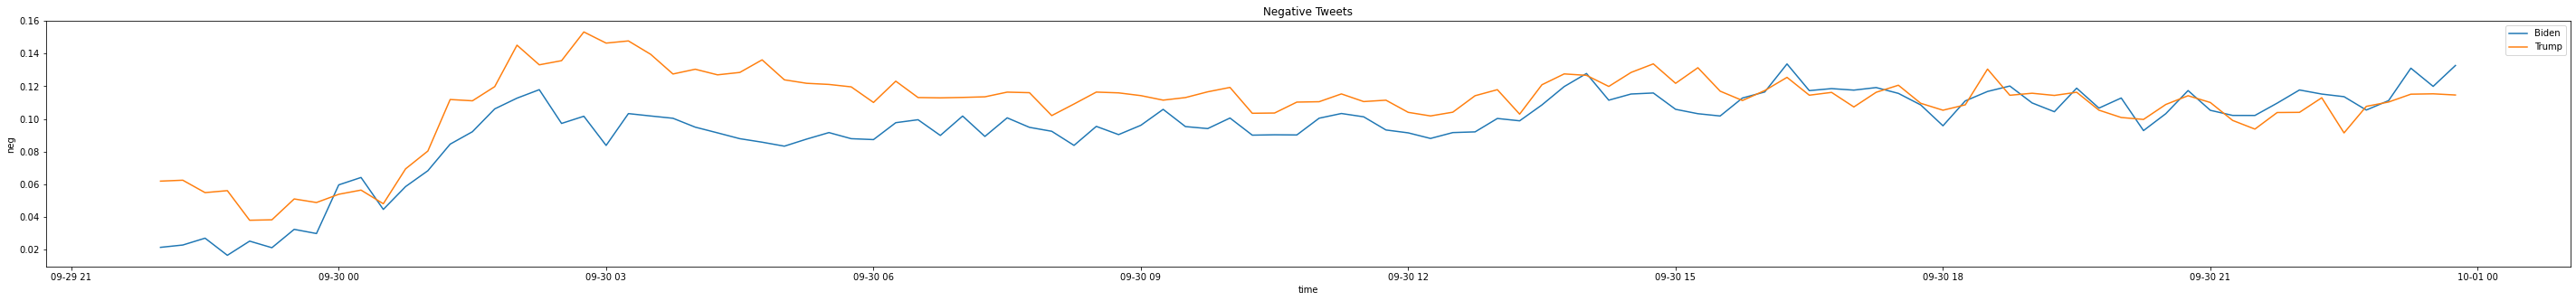

In [41]:
fig, ax = plt.subplots(figsize=(50, 5))
sns.lineplot(data=joe, x='time', y='neg', label = 'Biden', ax=ax).set_title("Neagtive Tweets")
sns.lineplot(data=trump, x='time', y='neg', label = 'Trump', ax=ax).set_title("Negative Tweets")